In [16]:
from algorithm import *

### Question 1

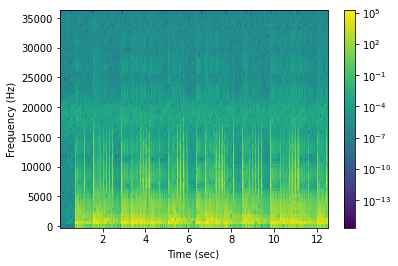

In [17]:
if __name__ == '__main__':

    encoder = Encoding()
    fs, s = read('./samples/Late truth - Audio Hertz.wav')
    encoder.process(fs, s[:900000])
    encoder.display_spectrogram(display_anchors=False)

In [18]:
f, t, Sxx = encoder.spectro

Sxx = Sxx.flatten()

Sxx.sort()
total_energy = float(sum(Sxx))
energy, i = 0., 1
while energy/total_energy < 0.9:
    energy += float(Sxx[-i])
    i += 1
print(f"Il faut {i} coefficients, sur {np.size(Sxx)} soit {100*(i/np.size(Sxx))}%.")


Il faut 9162 coefficients, sur 609310 soit 1.5036680835699396%.


On observe que l'énergie n'est pas répartie de façon uniforme, mais qu'elle est concentrée dans les basses fréqences ce qui est logique au vu des fréquences que l'oreille humaine capte. Par ailleurs, il ne faut en réalité que 1,5% des coefficients pour avoir 90% de l'énergie du signal.

### Question 2

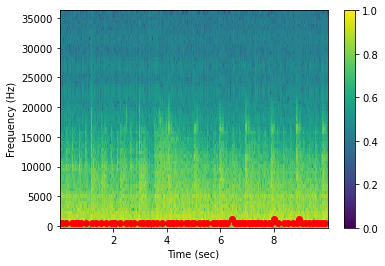

Number of maximums : 144


In [10]:
encoder.display_spectrogram(display_anchors=True)
print(f"Number of maximums : {np.size(encoder.anchors)}")

Lorsque l'on s'intéresse au nombre de maxima, on arrive a une centaine pour un paramètre de 50 en entrée de la fonction peak_local_max, ce qui semble raisonnable.  

### Question 3

Dans le hash il n'y a que la différence de temps entre la cible et l'ancre, ainsi le hash est invariant pas translation, on peut trouver un extrait même s'il n'a pas la même origine que le son original.

### Question 4

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io.wavfile import read
from algorithm import *
import scipy.signal


# ----------------------------------------------
# Run the script
# ----------------------------------------------
if __name__ == '__main__':

    folder = './samples/'

    # 1: Load the audio files
    import os
    audiofiles = os.listdir(folder)
    audiofiles = [item for item in audiofiles if item[-4:] =='.wav']

    # 2: Set the parameters of the encoder
    size = 128
    noverlap = 32

    # 3: Construct the database
    database = []
    
    for name in audiofiles:
        fingerprint = Encoding()
        fs, s = read('./samples/' + name)
        fingerprint.process(fs, s)
        hashes = fingerprint.hashes
        database.append({'song': name, 'hashcodes': hashes})

    # 4: Save the database
    with open('songs.pickle', 'wb') as handle:
        pickle.dump(database, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Question 5/6

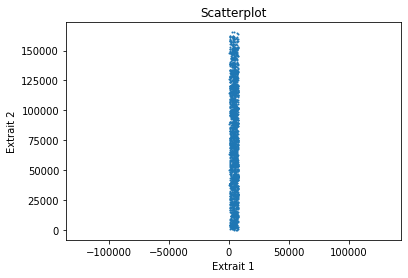

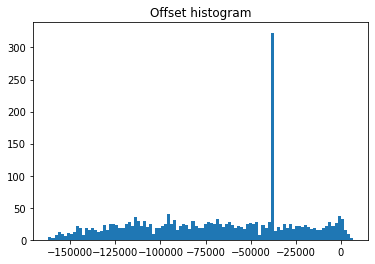

In [13]:
#Exemple lorsque l'extrait correspond au morceau avec un extrait et un morceau
# qui ont une longueur différente très différente

encoder = Encoding()
tmin = int(50*fs) # We select an extract starting at 50s ...
duration = int(10*fs) # ... which lasts 10s
fs, s = read('./samples/Frisk - Au.Ra.wav')
encoder.process(fs, s[tmin:tmin + duration])
hashes1 = encoder.hashes
encoder.process(fs, s)
hashes2 = encoder.hashes

match = Matching(hashes1, hashes2)
match.display_scatterplot()
match.display_histogram();


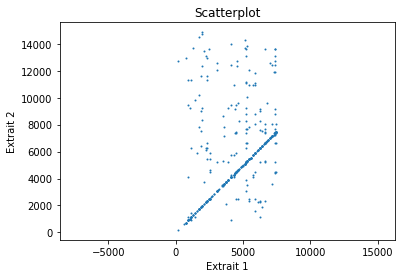

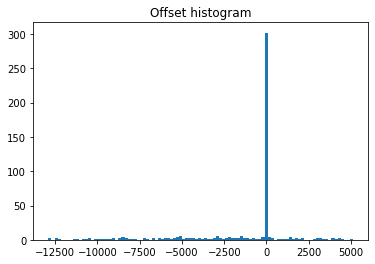

In [14]:

#Exemple lorsque l'extrait correspond au morceau avec un extrait et un morceau
# où le morceau est juste 2 fois plus long

encoder = Encoding()
tmin = int(50*fs) # We select an extract starting at 50s ...
duration = int(10*fs) # ... which lasts 10s
fs, s = read('./samples/Frisk - Au.Ra.wav')
encoder.process(fs, s[tmin:tmin + duration])
hashes1 = encoder.hashes
encoder.process(fs, s[tmin: tmin + duration*2])
hashes2 = encoder.hashes

match = Matching(hashes1, hashes2)
match.display_scatterplot()
match.display_histogram();


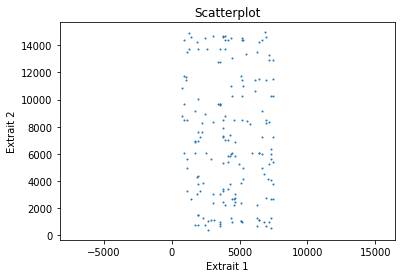

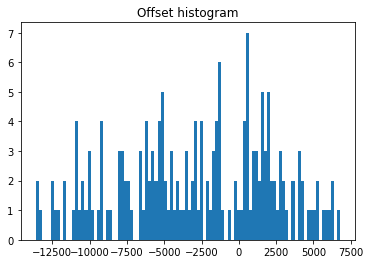

In [15]:
#Exemple lorsque l'extrait ne correspond PAS au morceau 
# et où le morceau est juste deux fois plus long

encoder = Encoding()
tmin = int(50*fs) # We select an extract starting at 50s ...
duration = int(10*fs) # ... which lasts 10s
fs, s = read('./samples/Frisk - Au.Ra.wav')
encoder.process(fs, s[tmin:tmin + duration])
hashes1 = encoder.hashes
fs, s = read('samples\Open Highway - ALBIS.wav')
encoder.process(fs, s[tmin: tmin + duration*2])
hashes2 = encoder.hashes

match = Matching(hashes1, hashes2)
match.display_scatterplot()
match.display_histogram();


Dans le cas général, quand on compare un extrait à un morceau, le nuage de point n'est pas très pertinent car l'échelle des temps pour les ancres ne sont pas du tout les mêmes à cause de la longueur du morceau par rapport à l'extrait. C'est le premier scatterplot.

Si les deux ont environ la même durée et qu'il y a correspondance, on observerait une droite de coefficient directeur 1. C'est le scatterplot 2. S'il n'y a pas de correspondance, on observe un nuage de points plus ou moins aléatoires. C'est le scatterplot 3.

En revanche, les histogrammes des offsets sont toujours très parlants car on peut identifier deux morceaux dès lors qu'il y a un pic qui se démarque nettement des autres, comme c'est le cas dans les deux permiers exemples. Si les deux morceaux ont le même offset, c'est à dire qu'ils comment au même moment, le pic sera centré sur 0. C'est ce qu'il y a sur l'histogramme 2.

### Question 7/8

Selected song: Frisk - Au.Ra
Trial song: Cash Machine - Anno Domini Beats


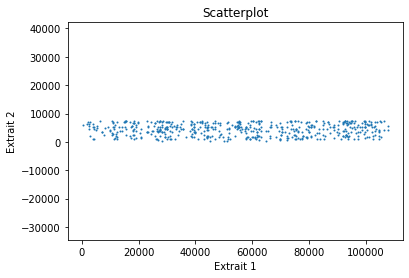

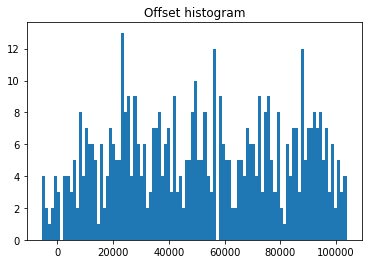

Trial song: Dark Alley Deals - Aaron Kenny


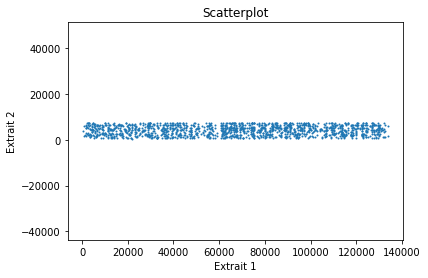

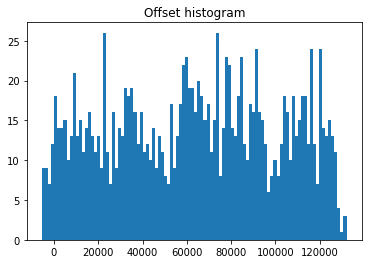

Trial song: Frisk - Au.Ra


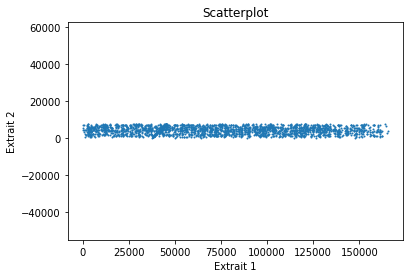

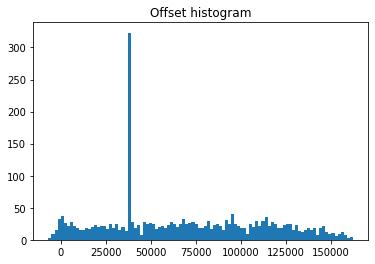

The song is Frisk - Au.Ra


In [20]:
"""
Description
"""
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io.wavfile import read
from algorithm import *

# ----------------------------------------------
# Run the script
# ----------------------------------------------
if __name__ == '__main__':

    # 1: Load the database
    with open('songs.pickle', 'rb') as handle:
        database = pickle.load(handle)

    # 2: Create an instance of the class Encoder

    encoder = Encoding()

    # 3: Randomly get an extract from one of the songs of the database

    songs = [item for item in os.listdir('./samples') if item[:-4] != '.wav']
    song = random.choice(songs)
    print('Selected song: ' + song[:-4])
    filename = './samples/' + song

    fs, s = read(filename)
    tmin = int(50*fs) # We select an extract starting at 50s ...
    duration = int(10*fs) # ... which lasts 10s

    # 4: Use the encoder to extract a fingerprint of the sample

    encoder.process(fs, s[tmin:tmin + duration])
    hashes1 = encoder.hashes

    # 5: Using the class Matching, compare the fingerprint to all the 
    # fingerprints in the database

    for song in songs:

        print('Trial song: ' + song[:-4])
        filename = './samples/' + song
        fs, s = read(filename)

        encoder.process(fs, s)
        hashes2 = encoder.hashes

        match = Matching(hashes2, hashes1)
        match.display_scatterplot()
        hist = match.display_histogram()
        
        if np.max(hist[0]) >= 150: #condition to identify th extract
            print('The song is ' + song[:-4])
            break

    


Comme nous l'avons vu, un extrait correspond à un morceau si le scatterplot présente une droite de coefficient directeur unitaire, et si l'histogramme présente un pic bien plus grand que tous les autres batons. 
Ici il fait au minimum près de 12 fois la taille de tous les autres. Ceci nous permet d'écrire une condition sur l'histogramme pour que l'algorithme identifie le morceau dont provient l'extrait. Nous mettons que la taille du pic maximal doit faire plus de 150.

On observe finalement que le code identidie de façon efficace le morceau !